# Key Insights 

- Most of the laureates are men. 
- In recent decades, women have been more prominent, especially in the Nobel Peace Prize (5 laureates in the 2010s).
- Marie Curie was the first woman to win a Nobel Prize and the first and only woman to win in more than one category.
- The country with the most Laureates is the United States of America
- Nobel Peace Prize is the only category in which an organization has won a prize

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
nobel=pd.read_csv('nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
nobel.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [19]:
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

***
# Winners by Gender

In [5]:
top_gender=nobel['sex'].value_counts().index[0]
top_gender

'Male'

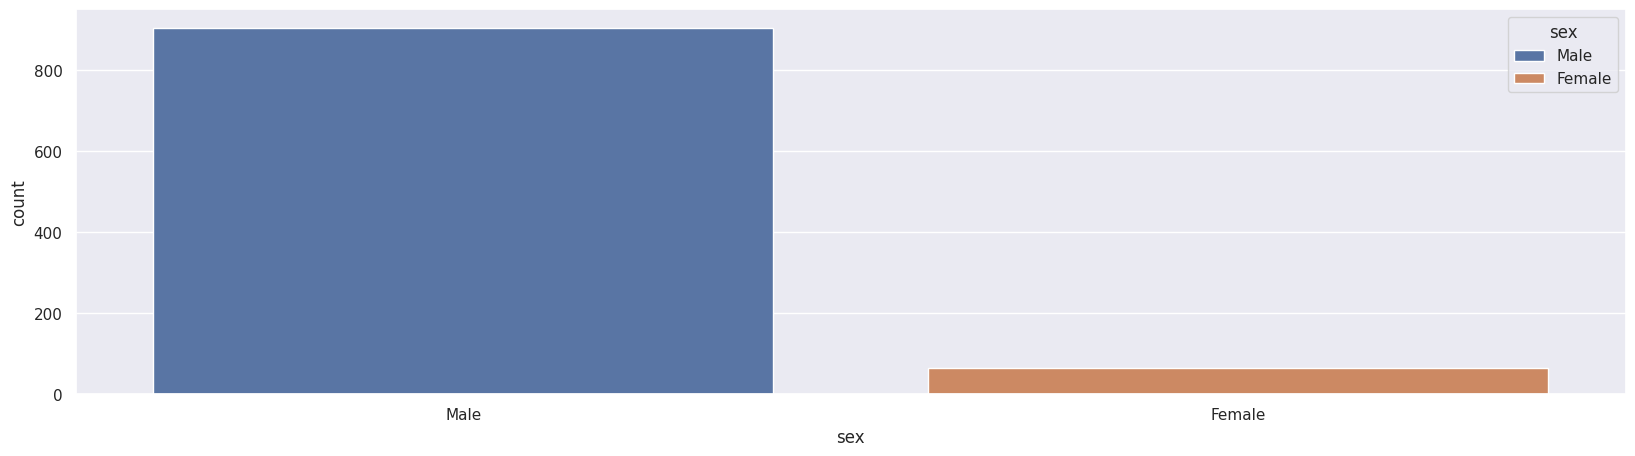

In [6]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(data=nobel, x='sex', hue='sex')
plt.show()

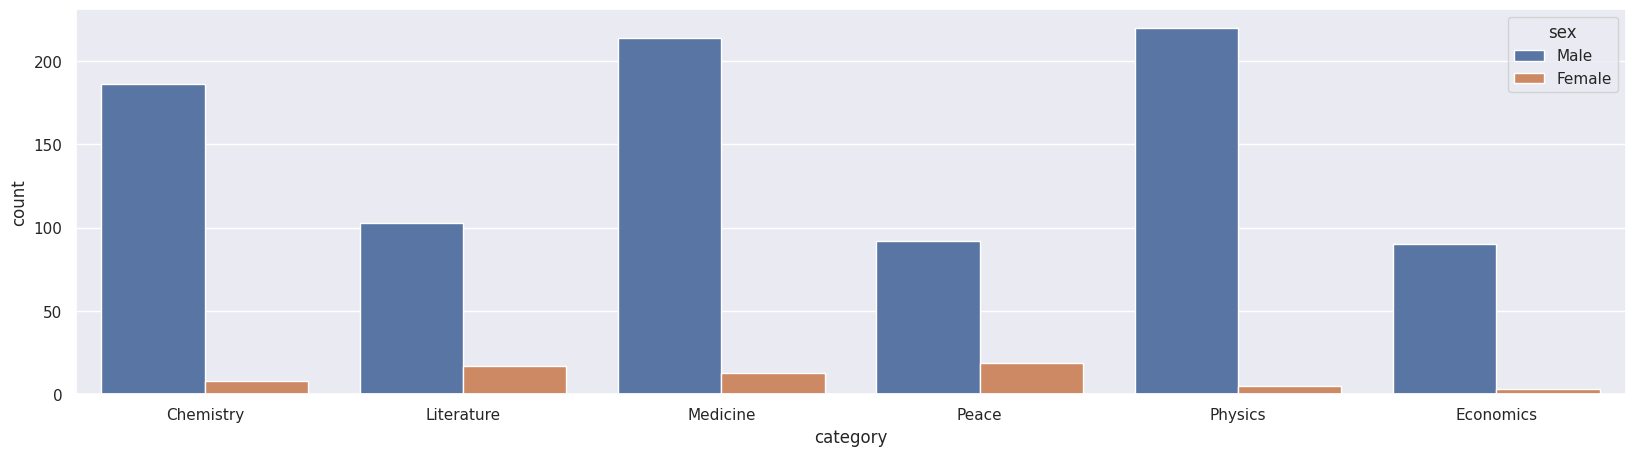

In [7]:
sns.countplot(data=nobel, x='category', hue='sex')

plt.show()

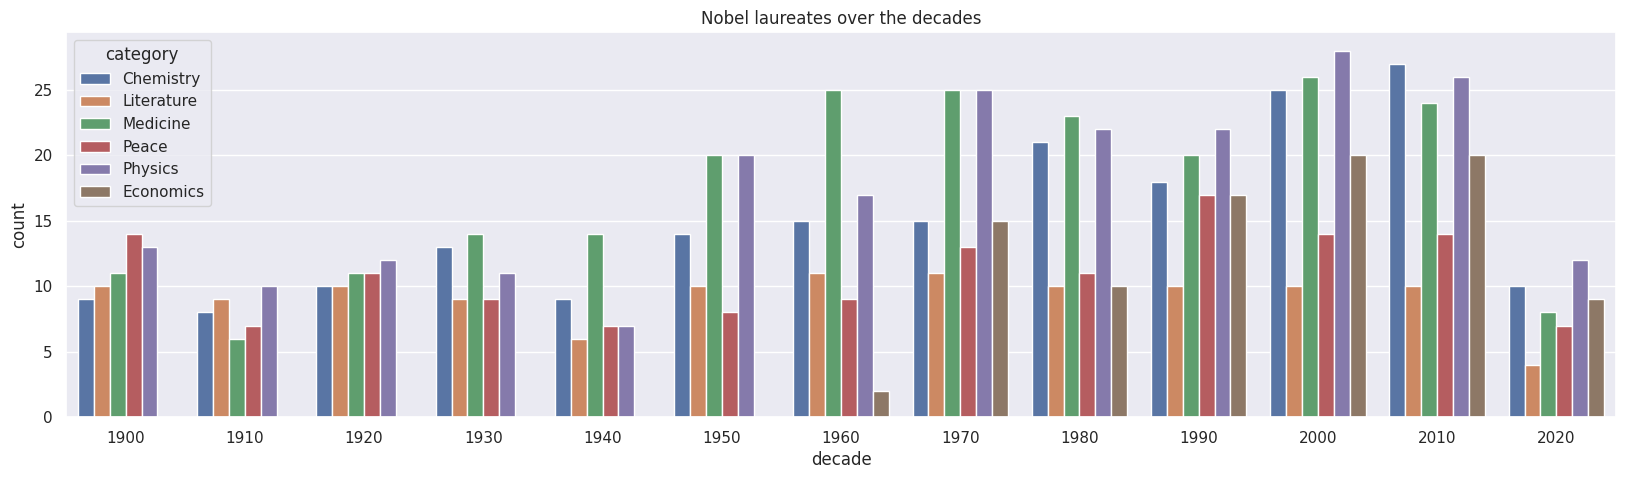

In [8]:
sns.countplot(data=nobel, x='decade', hue='category')

plt.title('Nobel laureates over the decades')
plt.show()

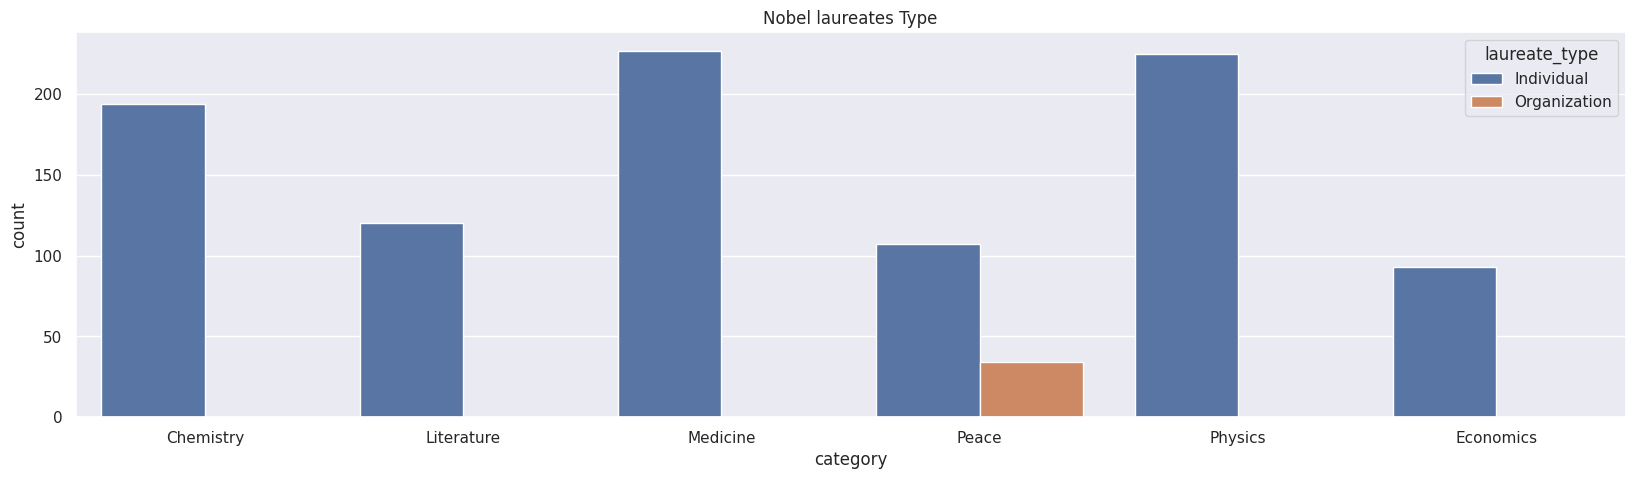

In [37]:
sns.countplot(data=nobel, x='category', hue='laureate_type')

plt.title('Nobel laureates Type')

plt.show()

***
# Birth Country

In [30]:
top_country=nobel['birth_country'].value_counts()
top20_countries = top_country.head(20)
top20_countries

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Japan                        28
Canada                       21
Switzerland                  19
Netherlands                  19
Russia                       18
Italy                        18
Austria                      16
Norway                       13
Denmark                      12
China                        11
Scotland                     10
Australia                    10
South Africa                  9
Belgium                       9
Germany (Poland)              8
Name: count, dtype: int64

In [34]:
nobel_top20 = nobel[nobel['birth_country'].isin(top20_countries.index)]

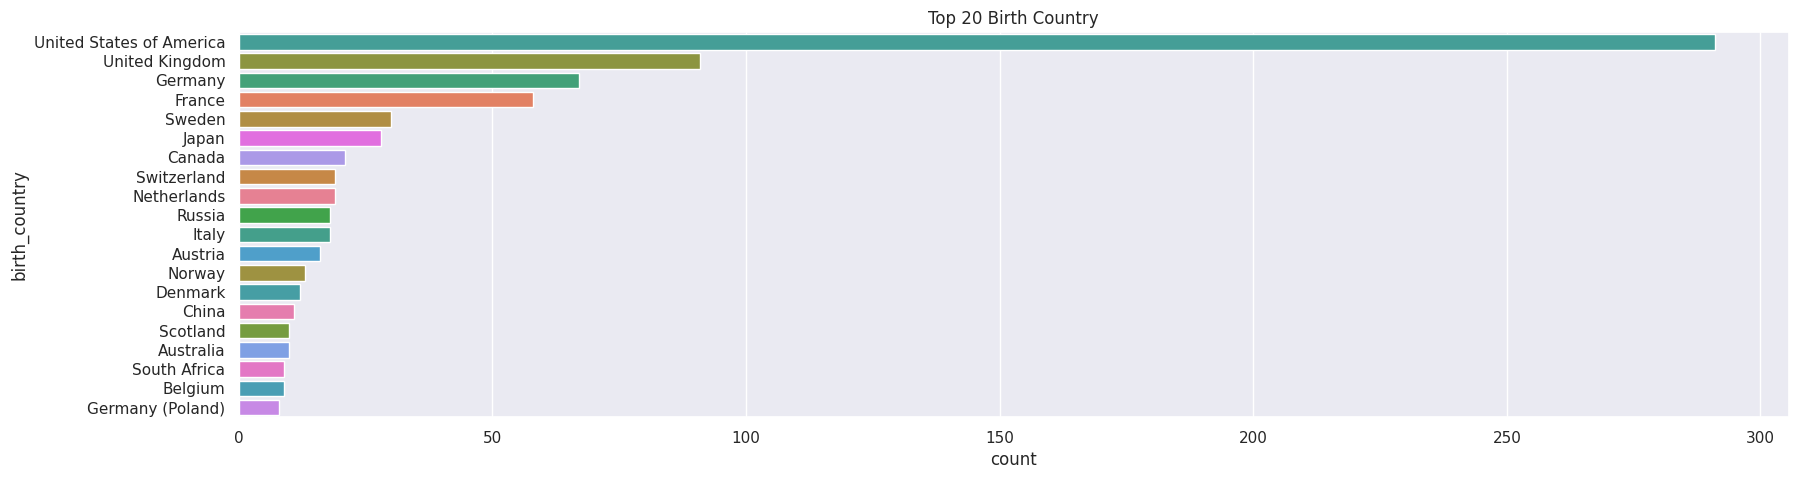

In [32]:
sns.countplot(data=nobel_top20, y='birth_country', hue='birth_country', order=top20_countries.index)

plt.title('Top 20 Birth Country')

plt.show()

In [12]:
# USA Winners
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'

prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].sum()
prop_usa_winners

,decade,usa_born_winner
0,1900,1
1,1910,3
2,1920,4
3,1930,14
4,1940,13
5,1950,21
6,1960,21
7,1970,33
8,1980,31
9,1990,42


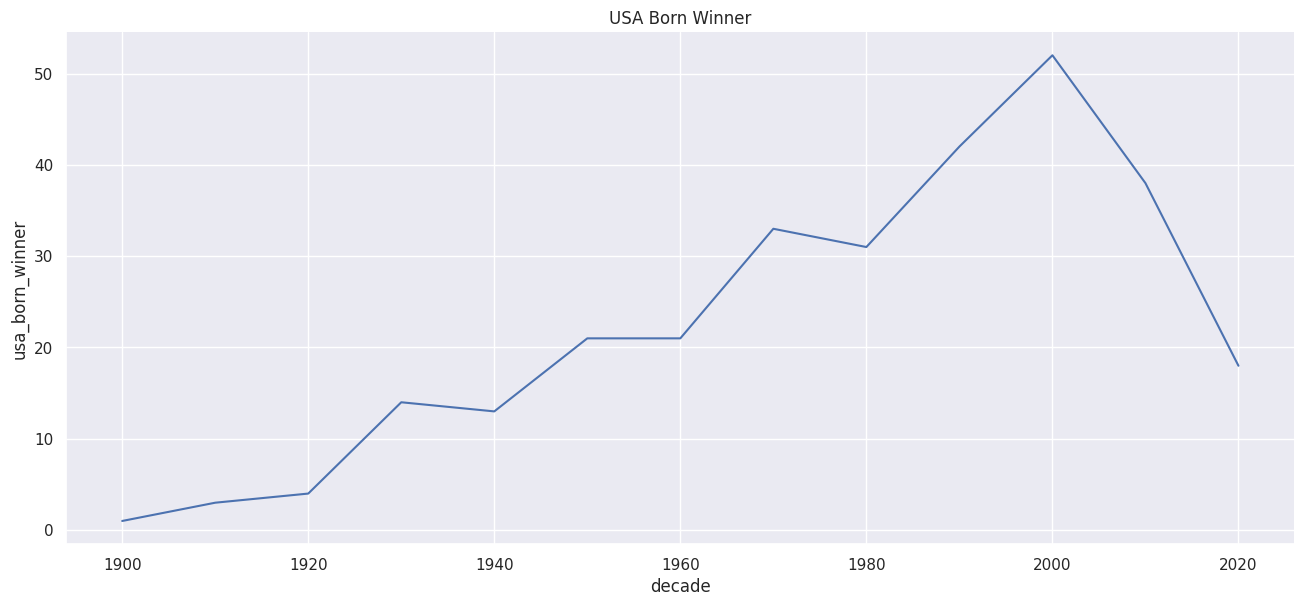

In [13]:
sns.relplot(data=prop_usa_winners, x='decade', y='usa_born_winner', kind='line', errorbar=None, markers=True, height=6, aspect=2.2)
plt.title('USA Born Winner')
plt.show()

***
# Female Winners

In [14]:
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].sum()
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

prop_female_winners

,decade,category,female_winner
0,1900,Chemistry,0
1,1900,Literature,1
2,1900,Medicine,0
3,1900,Peace,1
4,1900,Physics,1
...,...,...,...
67,2020,Economics,1
68,2020,Literature,2
69,2020,Medicine,1
70,2020,Peace,2


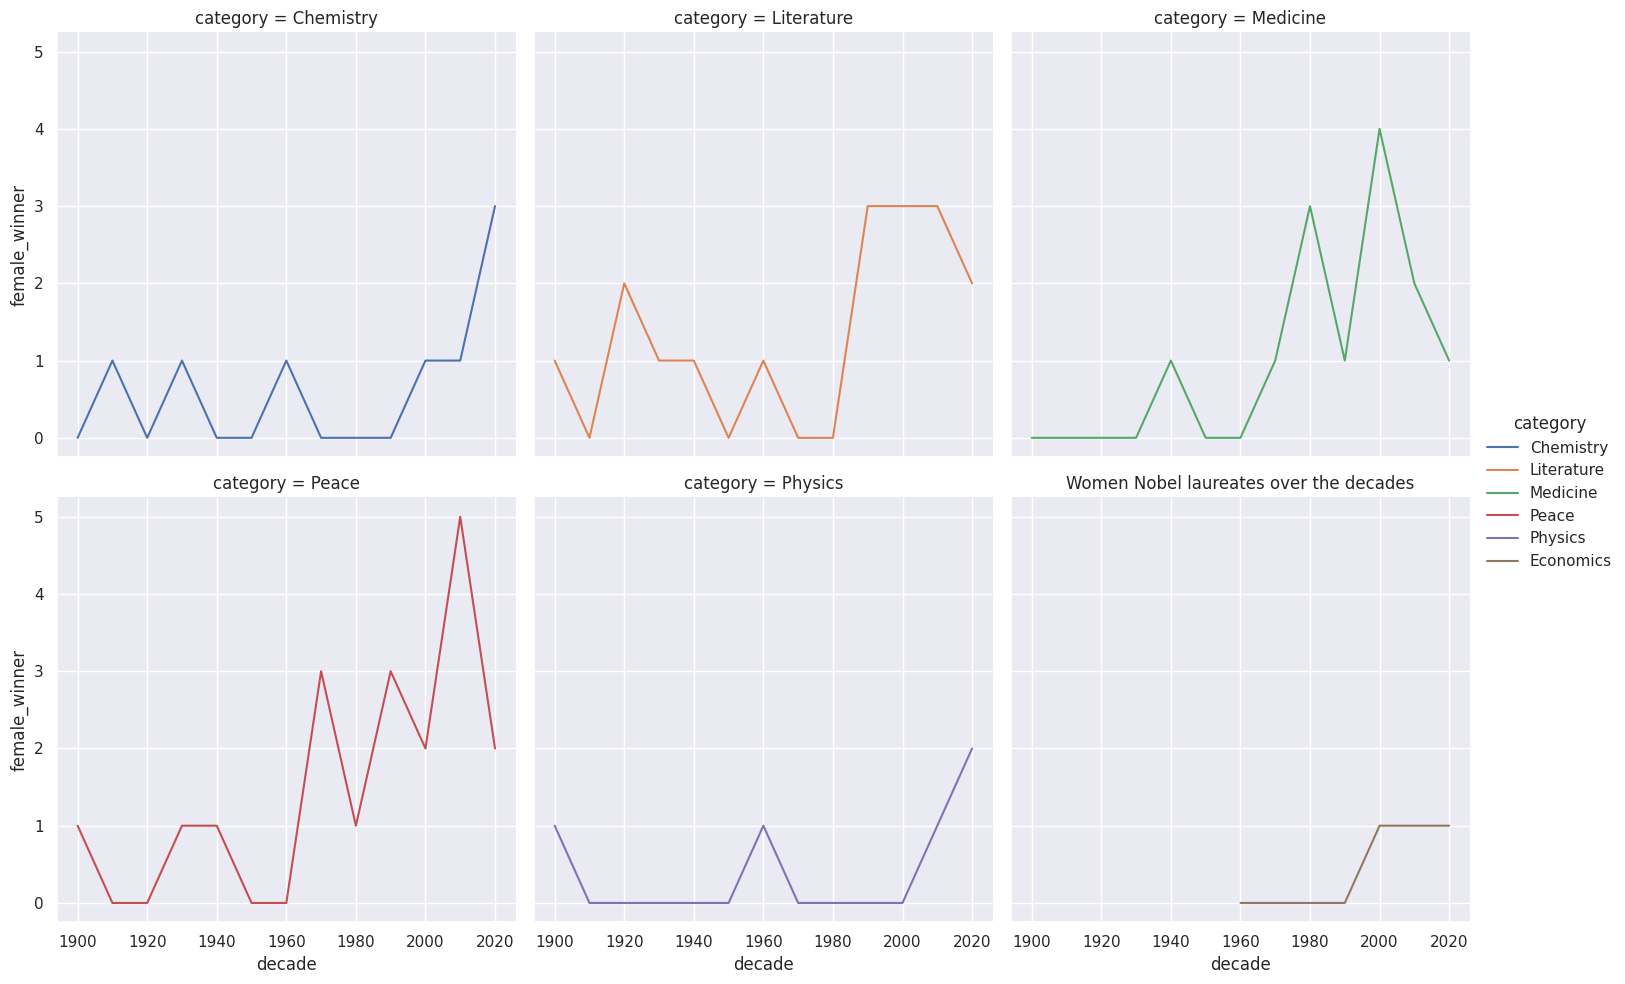

In [15]:
sns.relplot(data=prop_female_winners, x='decade', y='female_winner', hue='category', col='category', kind='line', col_wrap=3)

plt.title('Women Nobel laureates over the decades')
plt.show()

In [16]:
# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [17]:
# Two or more winners
counts=nobel['full_name'].value_counts()
repeat_list=list(counts[counts >= 2].index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'Marie Curie, née Sklodowska',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger']